In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from openai import OpenAI
import speech_recognition as sr
from datetime import datetime
from os import path, listdir, getcwd
import wave
import sys
from vosk import Model, KaldiRecognizer, SetLogLevel
import json

In [2]:
r = sr.Recognizer()
times_by_ggl = {}
times_by_whisper = {}
times_by_vosk = {}
transcription_by_ggl = {}
transcription_by_whisper = {}
transcription_by_vosk = {}

# Get all audio files
folder_path = "/../audio_files/audio-stimuli/3/"
audio_files = listdir(getcwd() + folder_path)

# Initialize Vosk model
start = datetime.now()
model = Model(model_name="vosk-model-en-us-0.22")
end = datetime.now()
total_time_vosk_model = end - start
total_time_vosk_model = int(total_time_vosk_model.total_seconds() * 1e6)
print(f'Time taken to initialize the model {str(total_time_vosk_model)[0: len(str(total_time_vosk_model)) - 6]}.{str(total_time_vosk_model)[len(str(total_time_vosk_model)) - 6: ]}')

LOG (VoskAPI:ReadDataFiles():model.cc:213) Decoding params beam=13 max-active=7000 lattice-beam=6
LOG (VoskAPI:ReadDataFiles():model.cc:216) Silence phones 1:2:3:4:5:11:12:13:14:15
LOG (VoskAPI:RemoveOrphanNodes():nnet-nnet.cc:948) Removed 0 orphan nodes.
LOG (VoskAPI:RemoveOrphanComponents():nnet-nnet.cc:847) Removing 0 orphan components.
LOG (VoskAPI:ReadDataFiles():model.cc:248) Loading i-vector extractor from /Users/kartikse/.cache/vosk/vosk-model-en-us-0.22/ivector/final.ie
LOG (VoskAPI:ComputeDerivedVars():ivector-extractor.cc:183) Computing derived variables for iVector extractor
LOG (VoskAPI:ComputeDerivedVars():ivector-extractor.cc:204) Done.
LOG (VoskAPI:ReadDataFiles():model.cc:279) Loading HCLG from /Users/kartikse/.cache/vosk/vosk-model-en-us-0.22/graph/HCLG.fst
LOG (VoskAPI:ReadDataFiles():model.cc:294) Loading words from /Users/kartikse/.cache/vosk/vosk-model-en-us-0.22/graph/words.txt
LOG (VoskAPI:ReadDataFiles():model.cc:303) Loading winfo /Users/kartikse/.cache/vosk/v

Time taken to initialize the model 7.222242


In [3]:
def time_taken_google_speech(audio):
    start = datetime.now()

    try:
        text = r.recognize_google(audio)
        # print("Google Speech Recognition thinks you said " + r.recognize_google(audio))
    except sr.UnknownValueError:
        print("Google Speech Recognition could not understand audio")
    except sr.RequestError as e:
        print("Could not request results from Google Speech Recognition service; {0}".format(e))

    end = datetime.now()
    total_time = end - start
    return (total_time, text)

In [4]:
def time_taken_openAI_whisper(audio):
    start = datetime.now()

    try:
        text = r.recognize_whisper(audio)
        # print(r.recognize_whisper(audio))
    except sr.UnknownValueError:
        print("Did not understand")
    except sr.RequestError as e:
        print(e)
    
    end = datetime.now()
    total_time = end - start
    return (total_time, text)
    # return total_time

In [5]:
def time_taken_vosk(audio):
    start = datetime.now()
    rec = KaldiRecognizer(model, audio.getframerate())
    rec.SetWords(True)
    rec.SetPartialWords(True)

    while True:
        data = audio.readframes(4000)
        if len(data) == 0:
            break
        if rec.AcceptWaveform(data):
            rec.Result()
            # print(rec.Result())
        else:
            rec.PartialResult()
    
    end = datetime.now()
    total_time = end - start
    final_result = json.loads(rec.FinalResult())
    final_result = final_result['text']
    return (total_time, final_result)

In [6]:
for audio_file in audio_files:
    print(audio_file)
    # AUDIO_FILE = path.join(path.dirname(path.realpath(__file__)), audio_file)
    AUDIO_FILE = getcwd() + folder_path + audio_file

    # use the audio file as the audio source
    with sr.AudioFile(AUDIO_FILE) as source:
        audio = r.record(source)  # read the entire audio file
    print(f"Processing Audio file - {audio_file}")
    print()
    print("Time taken by Google Speech Recognition")
    tt_ggl, text_ggl = time_taken_google_speech(audio)
    tt_ggl = int(tt_ggl.total_seconds() * 1e6)
    print(tt_ggl)
    times_by_ggl[audio_file] = tt_ggl
    transcription_by_ggl[audio_file] = text_ggl

    print("Time taken by OpenAI Whisper")
    tt_whisper, text_whisper = time_taken_google_speech(audio)
    tt_whisper = int(tt_whisper.total_seconds() * 1e6)
    print(tt_whisper)
    times_by_whisper[audio_file] = tt_whisper
    transcription_by_whisper[audio_file] = text_whisper
    print()

    ## Seperate audio file reading for vosk

    audio = wave.open(AUDIO_FILE)
    if audio.getnchannels() != 1 or audio.getsampwidth() != 2 or audio.getcomptype() != "NONE":
        print("Audio file must be WAV format mono PCM.")
        sys.exit(1)

    print("Time taken by Vosk")
    tt_vosk, text_vosk = time_taken_vosk(audio)
    tt_vosk = int(tt_vosk.total_seconds() * 1e6)
    print(tt_vosk)
    times_by_vosk[audio_file] = tt_vosk
    transcription_by_vosk[audio_file] = text_vosk
    print()

3.4.wav
Processing Audio file - 3.4.wav

Time taken by Google Speech Recognition
618979
Time taken by OpenAI Whisper
465627

Time taken by Vosk
119607

3.5.wav
Processing Audio file - 3.5.wav

Time taken by Google Speech Recognition
404012
Time taken by OpenAI Whisper
422820

Time taken by Vosk
80704

3.7.wav
Processing Audio file - 3.7.wav

Time taken by Google Speech Recognition
374136
Time taken by OpenAI Whisper
417931

Time taken by Vosk
82303

3.6.wav
Processing Audio file - 3.6.wav

Time taken by Google Speech Recognition
498117
Time taken by OpenAI Whisper
494715

Time taken by Vosk
69880

3.2.wav
Processing Audio file - 3.2.wav

Time taken by Google Speech Recognition
366294
Time taken by OpenAI Whisper
412932

Time taken by Vosk
78048

3.3.wav
Processing Audio file - 3.3.wav

Time taken by Google Speech Recognition
455667
Time taken by OpenAI Whisper
420987

Time taken by Vosk
92568

3.1.wav
Processing Audio file - 3.1.wav

Time taken by Google Speech Recognition
481513
Time 

In [7]:
total_times_ggl = 0
total_times_whisper = 0
total_times_vosk = 0

print("Total times taken by Google Speech Recognition")
for k in times_by_ggl:
    print(k, times_by_ggl[k])
    t = times_by_ggl[k]
    total_times_ggl += t
print()

print("Total times taken by OpenAI Whisper")
for k in times_by_whisper:
    print(k, times_by_whisper[k])
    t = times_by_whisper[k]
    total_times_whisper += t
print()

print("Total times taken by Vosk")
for k in times_by_vosk:
    print(k, times_by_vosk[k])
    t = times_by_vosk[k]
    total_times_vosk += t
print()


print(f'Total time taken by Google Speech Recognition to process {len(audio_files)} audio files is {str(total_times_ggl)[0: len(str(total_times_ggl)) - 6]}.{str(total_times_ggl)[len(str(total_times_ggl)) - 6: ]} seconds')
print(f'Total time taken by OpenAI Whisper to process {len(audio_files)} audio files is {str(total_times_whisper)[0: len(str(total_times_whisper)) - 6]}.{str(total_times_whisper)[len(str(total_times_whisper)) - 6: ]} seconds')
print(f'Total time taken by Vosk to process {len(audio_files)} audio files is {str(total_times_vosk)[0: len(str(total_times_vosk)) - 6]}.{str(total_times_vosk)[len(str(total_times_vosk)) - 6: ]} seconds')

Total times taken by Google Speech Recognition
3.4.wav 618979
3.5.wav 404012
3.7.wav 374136
3.6.wav 498117
3.2.wav 366294
3.3.wav 455667
3.1.wav 481513
3.8.wav 456015
3.9.wav 457015
3.10.wav 479927

Total times taken by OpenAI Whisper
3.4.wav 465627
3.5.wav 422820
3.7.wav 417931
3.6.wav 494715
3.2.wav 412932
3.3.wav 420987
3.1.wav 498977
3.8.wav 433523
3.9.wav 445222
3.10.wav 495344

Total times taken by Vosk
3.4.wav 119607
3.5.wav 80704
3.7.wav 82303
3.6.wav 69880
3.2.wav 78048
3.3.wav 92568
3.1.wav 95012
3.8.wav 92798
3.9.wav 48608
3.10.wav 83961

Total time taken by Google Speech Recognition to process 10 audio files is 4.591675 seconds
Total time taken by OpenAI Whisper to process 10 audio files is 4.508078 seconds
Total time taken by Vosk to process 10 audio files is .843489 seconds


In [8]:
times_by_ggl_sorted = {k: v for (k, v) in sorted(times_by_ggl.items(), key = lambda x: x[0])}
transcription_by_ggl_sorted = {k: v for (k, v) in sorted(transcription_by_ggl.items(), key = lambda x: x[0])}

times_by_whisper_sorted = {k: v for (k, v) in sorted(times_by_whisper.items(), key = lambda x: x[0])}
transcription_by_whisper_sorted = {k: v for (k, v) in sorted(transcription_by_whisper.items(), key = lambda x: x[0])}

times_by_vosk_sorted = {k: v for (k, v) in sorted(times_by_vosk.items(), key = lambda x: x[0])}
transcription_by_vosk_sorted = {k: v for (k, v) in sorted(transcription_by_vosk.items(), key = lambda x: x[0])}

In [9]:
whisper_df = pd.DataFrame(list(zip(times_by_whisper_sorted.keys(), times_by_whisper_sorted.values(), transcription_by_whisper_sorted.values())))
whisper_df.columns = ['File Name', 'Time to Convert', 'Transcribed Text']
whisper_df

,File Name,Time to Convert,Transcribed Text
0,3.1.wav,498977,close the door
1,3.10.wav,495344,you're losing me
2,3.2.wav,412932,don't do that
3,3.3.wav,420987,how are
4,3.4.wav,465627,how's it going
5,3.5.wav,422820,I don't agree
6,3.6.wav,494715,please get me
7,3.7.wav,417931,please repeat that
8,3.8.wav,433523,what's going on
9,3.9.wav,445222,why don't you


In [10]:
ggl_df = pd.DataFrame(list(zip(times_by_ggl_sorted.keys(), times_by_ggl_sorted.values(), transcription_by_ggl_sorted.values())))
ggl_df.columns = ['File Name', 'Time to Convert', 'Transcribed Text']
ggl_df

,File Name,Time to Convert,Transcribed Text
0,3.1.wav,481513,close the door
1,3.10.wav,479927,you're losing me
2,3.2.wav,366294,don't do that
3,3.3.wav,455667,how are
4,3.4.wav,618979,how's it going
5,3.5.wav,404012,I don't agree
6,3.6.wav,498117,please get me
7,3.7.wav,374136,please repeat that
8,3.8.wav,456015,what's going on
9,3.9.wav,457015,why don't you


In [11]:
vosk_df = pd.DataFrame(list(zip(times_by_vosk_sorted.keys(), times_by_vosk_sorted.values(), transcription_by_vosk_sorted.values())))
vosk_df.columns = ['File Name', 'Time to Convert', 'Transcribed Text']
vosk_df

,File Name,Time to Convert,Transcribed Text
0,3.1.wav,95012,close the door
1,3.10.wav,83961,you're losing me
2,3.2.wav,78048,don't do that
3,3.3.wav,92568,how are things
4,3.4.wav,119607,how's it going
5,3.5.wav,80704,i don't agree
6,3.6.wav,69880,please get me
7,3.7.wav,82303,please repeat that
8,3.8.wav,92798,what's going on
9,3.9.wav,48608,why don't you


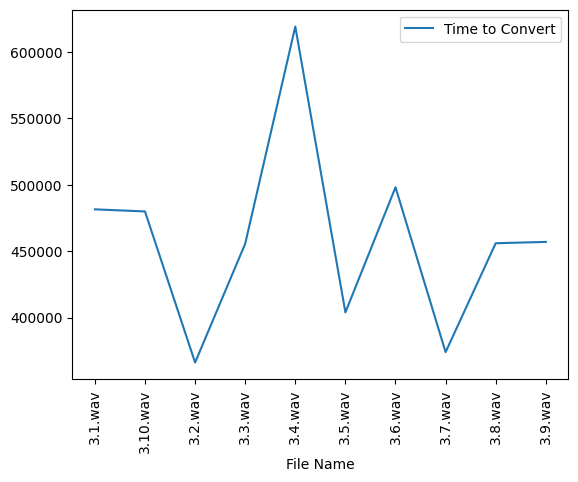

In [12]:
ggl_plot = ggl_df.plot.line(x='File Name', y='Time to Convert')
ggl_plot.set_xticks(np.arange(len(times_by_ggl_sorted)))
ggl_plot.set_xticklabels(ggl_df['File Name'])
ggl_plot.tick_params(axis='x', labelrotation=90)

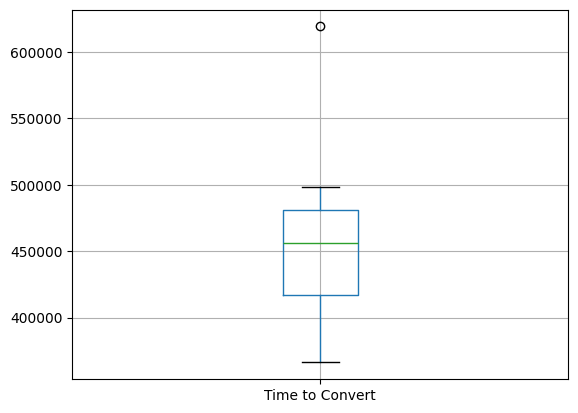

In [13]:
ggl_box_plot = ggl_df.boxplot(column='Time to Convert')

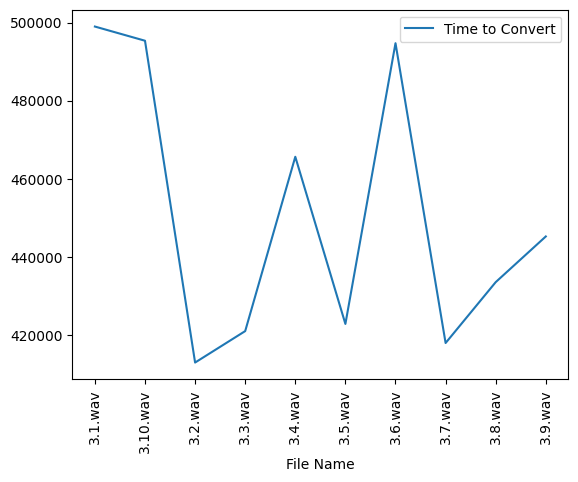

In [14]:
whisper_plot = whisper_df.plot.line(x='File Name', y='Time to Convert')
whisper_plot.set_xticks(np.arange(len(times_by_whisper_sorted)))
whisper_plot.set_xticklabels(whisper_df['File Name'])
whisper_plot.tick_params(axis='x', labelrotation=90)

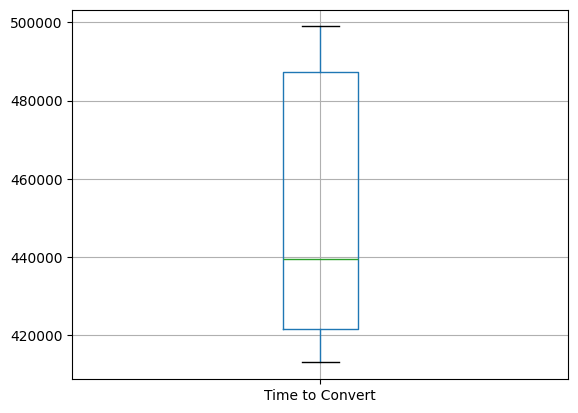

In [15]:
whisper_box_plot = whisper_df.boxplot(column='Time to Convert')

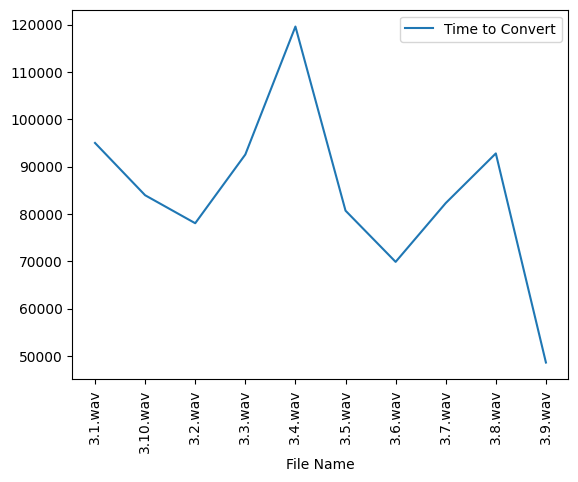

In [16]:
vosk_plot = vosk_df.plot.line(x='File Name', y='Time to Convert')
vosk_plot.set_xticks(np.arange(len(times_by_vosk_sorted)))
vosk_plot.set_xticklabels(vosk_df['File Name'])
vosk_plot.tick_params(axis='x', labelrotation=90)

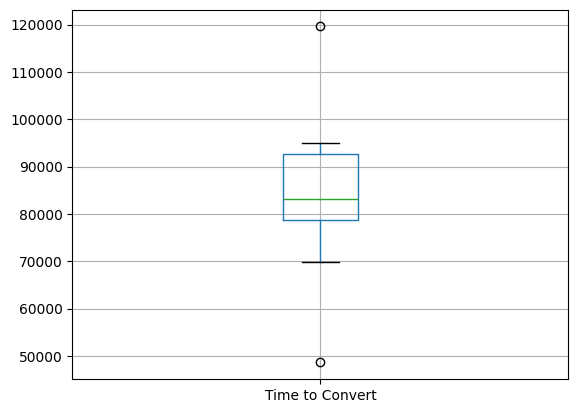

In [17]:
vosk_box_plot = vosk_df.boxplot(column='Time to Convert')